In [1]:
#Aplicando o modelo de Regressão Logística no Dataset de Variáveis Numéricas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [20]:
Data_Numerical = pd.read_csv('Dataset_Numerical.csv')

In [21]:
Data_Numerical

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Result Test COVID
0,17,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0
1,1,-1.571682,-0.774212,1.429667,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0
2,9,-0.747693,-0.586244,-0.429480,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,0
3,11,0.991838,0.792188,0.072992,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,0
4,9,0.190738,-0.147652,-0.668155,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,19,0.190738,0.165628,-0.102873,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948,0
597,19,-0.289922,-0.523588,0.663397,0.754327,-1.532437,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144,0
598,15,0.717175,1.105468,-0.492289,0.613284,0.002791,1.538664,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812,0
599,17,-3.242548,-2.779203,-1.773594,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,2.059952,-0.582671,1.408024,1.381812,-0.448160,0


In [ ]:
#Dividindo meu Dataset em Treinamento e Teste

In [5]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(Data_Numerical.drop('Result Test COVID',axis=1), 
                                                    Data_Numerical['Result Test COVID'], test_size=0.30, 
                                                    random_state=101)

In [9]:
#Treinamento e Predição

In [7]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [23]:
predictions = logmodel.predict(X_test)

In [23]:
#Resultado

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       162
           1       0.50      0.63      0.56        19

    accuracy                           0.90       181
   macro avg       0.73      0.78      0.75       181
weighted avg       0.91      0.90      0.90       181



In [26]:
print(confusion_matrix(y_test,predictions))

[[150  12]
 [  7  12]]


In [28]:
#Tentando melhorar o modelo, considerando que está desbalanceado

In [27]:
# check the distribution

Data_Numerical['Result Test COVID'].value_counts()/Data_Numerical.shape[0]

0    0.861897
1    0.138103
Name: Result Test COVID, dtype: float64

In [28]:
# define class weights

w = {0:13.8103, 1:86.1897}

logmodel2 = LogisticRegression(class_weight=w)
logmodel2.fit(X_train,y_train)

predictions2 = logmodel.predict(X_test)

In [30]:
print(confusion_matrix(y_test,predictions2))

[[150  12]
 [  7  12]]


In [31]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       162
           1       0.50      0.63      0.56        19

    accuracy                           0.90       181
   macro avg       0.73      0.78      0.75       181
weighted avg       0.91      0.90      0.90       181



In [54]:
#Feature Importance

In [32]:
# get importance

importance = logmodel.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
    print(str(list(Data_Numerical.columns.values)[i]) + ' Score: %.5f' % (v))

Patient age quantile Score: 0.10708
Hematocrit Score: 0.12439
Hemoglobin Score: 0.07165
Platelets Score: -0.50992
Red blood Cells Score: 0.11821
Lymphocytes Score: -0.00502
Mean corpuscular hemoglobin concentration (MCHC) Score: -0.04207
Leukocytes Score: -1.23292
Basophils Score: -0.09168
Mean corpuscular hemoglobin (MCH) Score: -0.06136
Eosinophils Score: -1.43405
Mean corpuscular volume (MCV) Score: -0.11913
Monocytes Score: 0.29231
Red blood cell distribution width (RDW) Score: -0.13605


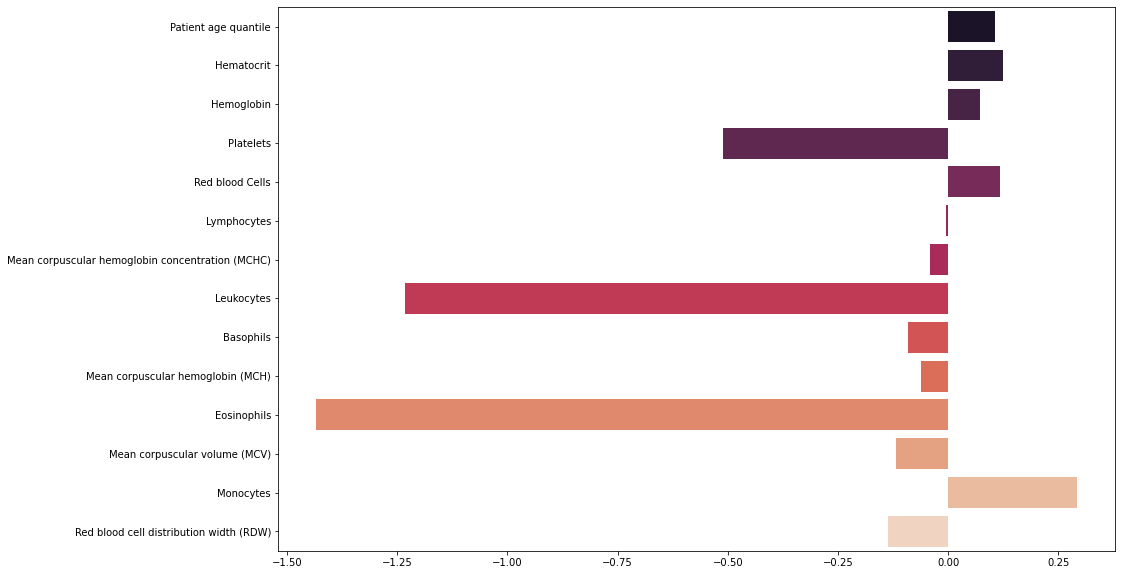

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(y=[str(list(Data_Numerical.columns.values)[y]) for y in range(len(importance))], x=importance, palette="rocket",orient="h")